2. (\*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html). Применить к данным на уроке и сравнить ответы.

In [24]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [27]:
# Для начала отмасштабируем выборку
X_ = X.astype(float)

rows, cols = X_.shape

# центрирование - вычитание из каждого значения среднего по признаку
means = X_.mean(axis=0)
#for i in range(rows):
#    for j in range(cols):
#        X_[i, j] -= means[j]

# деление каждого значения на стандартное отклонение
std = np.std(X_, axis=0)
for j in range(cols):
    for i in range(rows):
        X_[i, j] = (X[i, j] - means[j]) / std[j]

In [28]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X_.T.dot(X_)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
437.77467247979916
137.10457072021052
22.01353133569726
3.107225464292839


In [29]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329989, 22.850761786701764, 3.6689218892828777, 0.5178709107154734]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [30]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [31]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_.dot(W)
Z.shape

(150, 2)

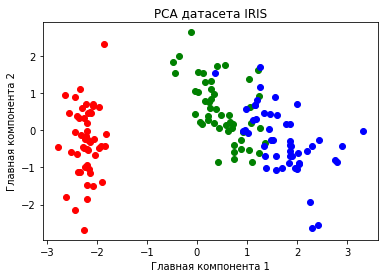

In [32]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [21]:
def PCA_SVD(data, limit=0.95):
    X_ = data.astype(float)
    
    u, s, v = np.linalg.svd(X_)
    s = s ** 2
    
    eig_sum, cumul, count = sum(s), 0.0, 0
    for i in s:
        cumul += i / eig_sum
        count += 1
        if cumul >= limit:
            break
    
    W_svd = v[:count].T
    
    return W_svd, count

In [22]:
w, count = PCA_SVD(X_)
Z = X_.dot(w)
w, count, Z.shape

(array([[ 0.52106591, -0.37741762],
        [-0.26934744, -0.92329566],
        [ 0.5804131 , -0.02449161],
        [ 0.56485654, -0.06694199]]), 2, (150, 2))

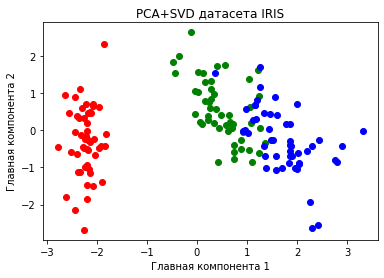

In [23]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA+SVD датасета IRIS')
plt.show()